In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [42]:
# ! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
df = pd.read_csv('rest_cleandata.csv')

In [17]:
df

NAME  RATING  \
0                                  Table Tales     4.8   
1                      Banjara- Gourmet Dining     4.5   
2               Laurel - An Essence Of Flavors     5.0   
3                           The Chocolate Room     5.0   
4                                      Essence     4.5   
..                                         ...     ...   
535                       Blah Bla (Indigo XP)     3.9   
536                               Scottish Pub     4.8   
537  Salt - Pan Indian Restaurant, Bar & Grill     4.2   
538                                 Frenzy Pub     4.5   
539                                 Howl’n Pub     4.3   

                                  AREA                 DISHES  APPROX  \
0             Bodakdev, West Ahmedabad           Multicuisine    1500   
1             Bodakdev, West Ahmedabad           Multicuisine    1700   
2                     Ambli, Ahmedabad           Multicuisine    1800   
3        Prahlad Nagar, West Ahmedabad                 Bakery     500   
4              Crowne Plaza, Ahmedabad   Indian, North Indian    2000   
..                                 ...                    ...     ...   
535       Koramangala, South Bengaluru           Multicuisine    2000   
536  St. Marks Road, Central Bengaluru           Multicuisine    2000   
537         UB City, Central Bengaluru  Indian, Cocktail Menu    2000   
538       Marathahalli, East Bengaluru           Multicuisine    2000   
539   Church Street, Central Bengaluru           Multicuisine    1400   

     DISCOUNT   LOCATION  
0        10.0  Ahmedabad  
1        20.0  Ahmedabad  
2        20.0  Ahmedabad  
3        35.0  Ahmedabad  
4        50.0  Ahmedabad  
..        ...        ...  
535      40.0  Bengaluru  
536      10.0  Bengaluru  
537       NaN  Bengaluru  
538      40.0  Bengaluru  
539      10.0  Bengaluru  

[540 rows x 7 columns]

In [18]:
df['DISHES'] = df['DISHES'].str.split(',')

In [19]:
ex_data = df.explode('DISHES')

In [20]:
ex_data['DISHES']

0        Multicuisine
1        Multicuisine
2        Multicuisine
3              Bakery
4              Indian
            ...      
536      Multicuisine
537            Indian
537     Cocktail Menu
538      Multicuisine
539      Multicuisine
Name: DISHES, Length: 708, dtype: object

In [21]:
ex_data['DISHES'] = ex_data['DISHES'].apply(lambda x: x.replace(' ', ''))

In [22]:
ex_data['DISHES']

0      Multicuisine
1      Multicuisine
2      Multicuisine
3            Bakery
4            Indian
           ...     
536    Multicuisine
537          Indian
537    CocktailMenu
538    Multicuisine
539    Multicuisine
Name: DISHES, Length: 708, dtype: object

In [69]:
# ex_data = ex_data[ex_data['DISHES'] != 'Multicuisine']

# EDA

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      540 non-null    object 
 1   RATING    540 non-null    float64
 2   AREA      540 non-null    object 
 3   DISHES    540 non-null    object 
 4   APPROX    540 non-null    int64  
 5   DISCOUNT  389 non-null    float64
 6   LOCATION  540 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 29.7+ KB


In [27]:
num_cols = df.select_dtypes(exclude=['object']).columns.to_list()
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
print(num_cols)
print('-'*40)
print(cat_cols)

['RATING', 'APPROX', 'DISCOUNT']
----------------------------------------
['NAME', 'AREA', 'DISHES', 'LOCATION']


# Univariate Analysis

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

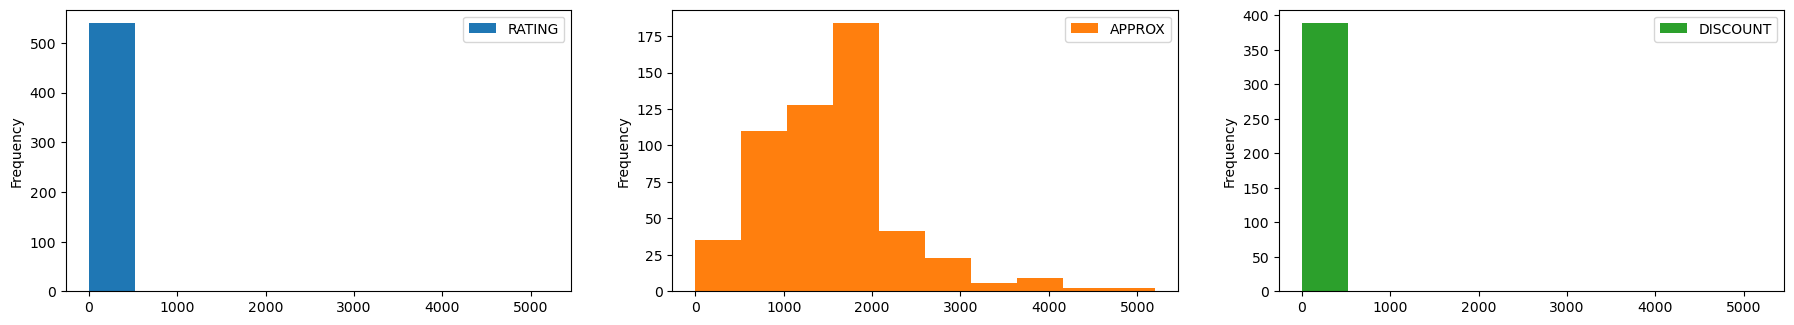

In [17]:
df[num_cols].plot(kind= 'hist', subplots= True, figsize=(30,30), layout=(7,4))

RATING         Axes(0.125,0.786098;0.168478x0.0939024)
APPROX      Axes(0.327174,0.786098;0.168478x0.0939024)
DISCOUNT    Axes(0.529348,0.786098;0.168478x0.0939024)
dtype: object

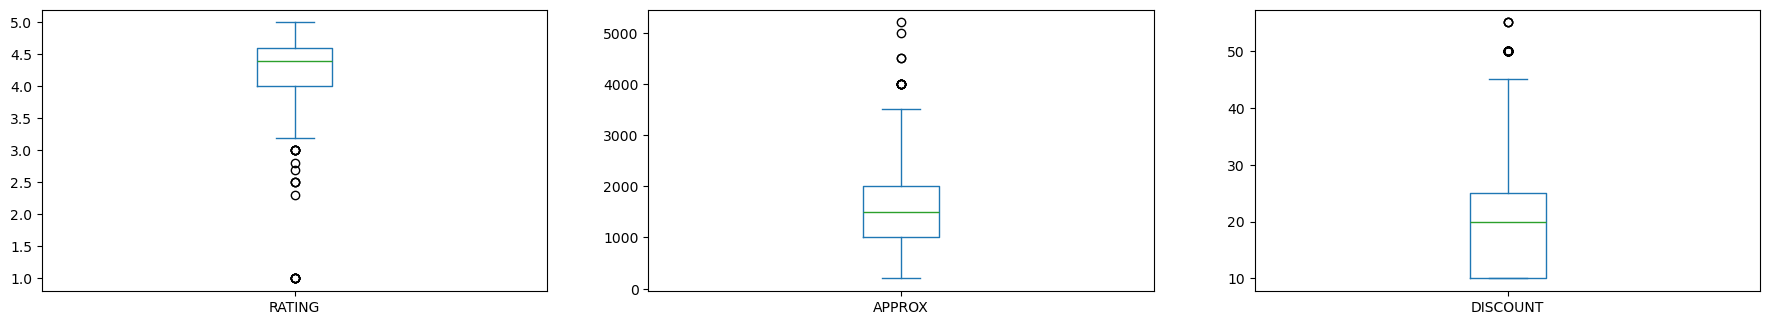

In [18]:
df[num_cols].plot(kind= 'box', subplots= True, figsize=(30,30), layout=(7,4))

In [32]:
def numerical_analysis(data):
  # Stat Analysis
  for col in data.columns:
    print("*"*10 , col , "*"*10)
    print(data[col].agg({ "Minimum" : "min",
                          "Max" : "max",
                          "Mean" : "mean",
                          "Median" : "median",
                          "STD" : "std",
                          "Skew"  : "skew",
                          "Kurtosis" : "kurt",
                          "75th Percentile" : lambda x : x.quantile(0.75),
                          "95th Percentile" : lambda x : x.quantile(0.95)
                          }))
    print()

    # Viz Analysis
    plt.figure(figsize=(8, 4))

    ## Subplot 1
    plt.subplot(1, 2, 1)
    data[col].plot(kind="hist")

    ## Subplot 2
    plt.subplot(1, 2, 2)
    data[col].plot(kind="box")

    plt.tight_layout()
    plt.show()


********** RATING **********
Minimum             1.000000
Max                 5.000000
Mean                4.268333
Median              4.400000
STD                 0.596073
Skew               -2.710593
Kurtosis           12.092759
75th Percentile     4.600000
95th Percentile     5.000000
Name: RATING, dtype: float64



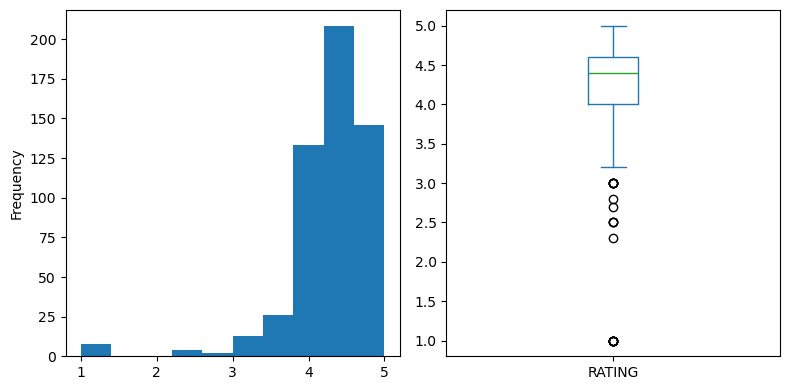

********** APPROX **********
Minimum             200.000000
Max                5200.000000
Mean               1626.009259
Median             1500.000000
STD                 795.981588
Skew                  0.921827
Kurtosis              1.776243
75th Percentile    2000.000000
95th Percentile    3000.000000
Name: APPROX, dtype: float64



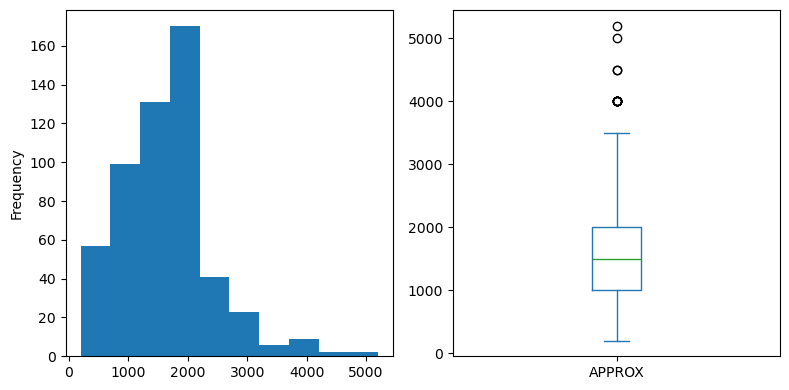

********** DISCOUNT **********
Minimum            10.000000
Max                55.000000
Mean               21.992288
Median             20.000000
STD                12.345016
Skew                1.117955
Kurtosis            0.437915
75th Percentile    25.000000
95th Percentile    50.000000
Name: DISCOUNT, dtype: float64



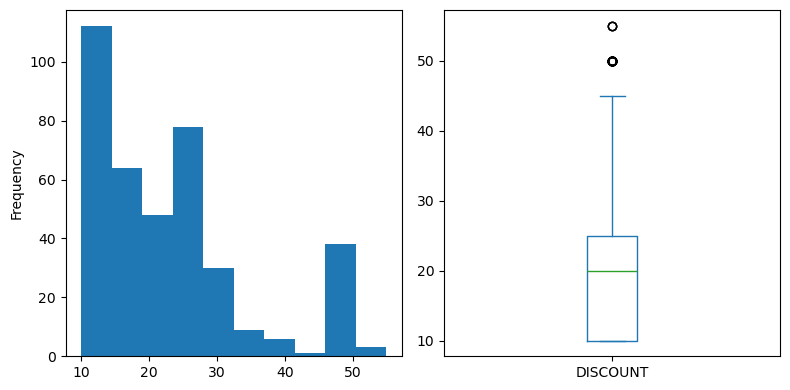

In [33]:
numerical_analysis(df[num_cols])

In [47]:
pune_dishes = ' '.join(ex_data[ex_data['LOCATION'] == 'Pune']['DISHES'].astype(str))

In [48]:
pune_dishes

'Continental Asian Mediterranean ModernIndian Desserts European Italian HealthyFood American Beverages European Multicuisine Chinese NorthIndian Multicuisine Multicuisine Multicuisine FingerFood CocktailMenu Multicuisine Multicuisine AllDayDining Mughlai Korean NorthIndian NorthIndian Seafood Multicuisine CocktailMenu Multicuisine Multicuisine European PanAsian oriental Multicuisine Cafe Multicuisine Bakery HealthyFood Vegan Cafe Multicuisine Asian SouthIndian Multicuisine Multicuisine Italian Coffee Cafe European FastFood Chinese CocktailMenu NorthIndian Desserts Asian Salad Mediterranean NorthIndian Multicuisine PanAsian Italian Mexican Multicuisine HealthyFood Chinese Multicuisine Multicuisine PanAsian Multicuisine Multicuisine CocktailMenu Multicuisine Italian SouthIndian Multicuisine Multicuisine Multicuisine Multicuisine Mediterranean Continental Multicuisine Multicuisine Multicuisine NorthIndian Multicuisine Multicuisine Multicuisine American Cafe Desserts Multicuisine Multicuis

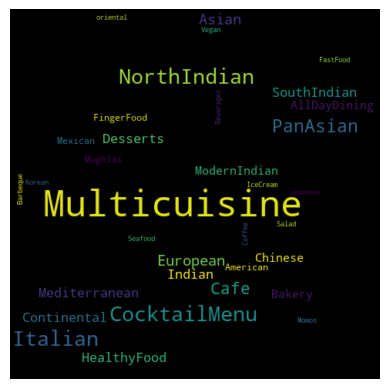

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(pune_dishes)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [61]:
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt
# city = ['Ahmedabad','Mumbai','Pune','Bengaluru']

# for c in city:

#     c_dishes = ' '.join(ex_data[ex_data['LOCATION'] == c]['DISHES'].astype(str))
    
#     stopwords = set(STOPWORDS)
#     stopwords.update(['Multicuisine'])  # optional
    
#     wordcloud = WordCloud(
#         width=1000, height=600,
#         background_color='white',
#         colormap='Set2',
#         max_words=75,
#         stopwords=stopwords
#     ).generate(c_dishes)
    
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.title(f"Popular Cuisines in {c}", fontsize=18)
#     plt.tight_layout(pad=0)
#     plt.show()

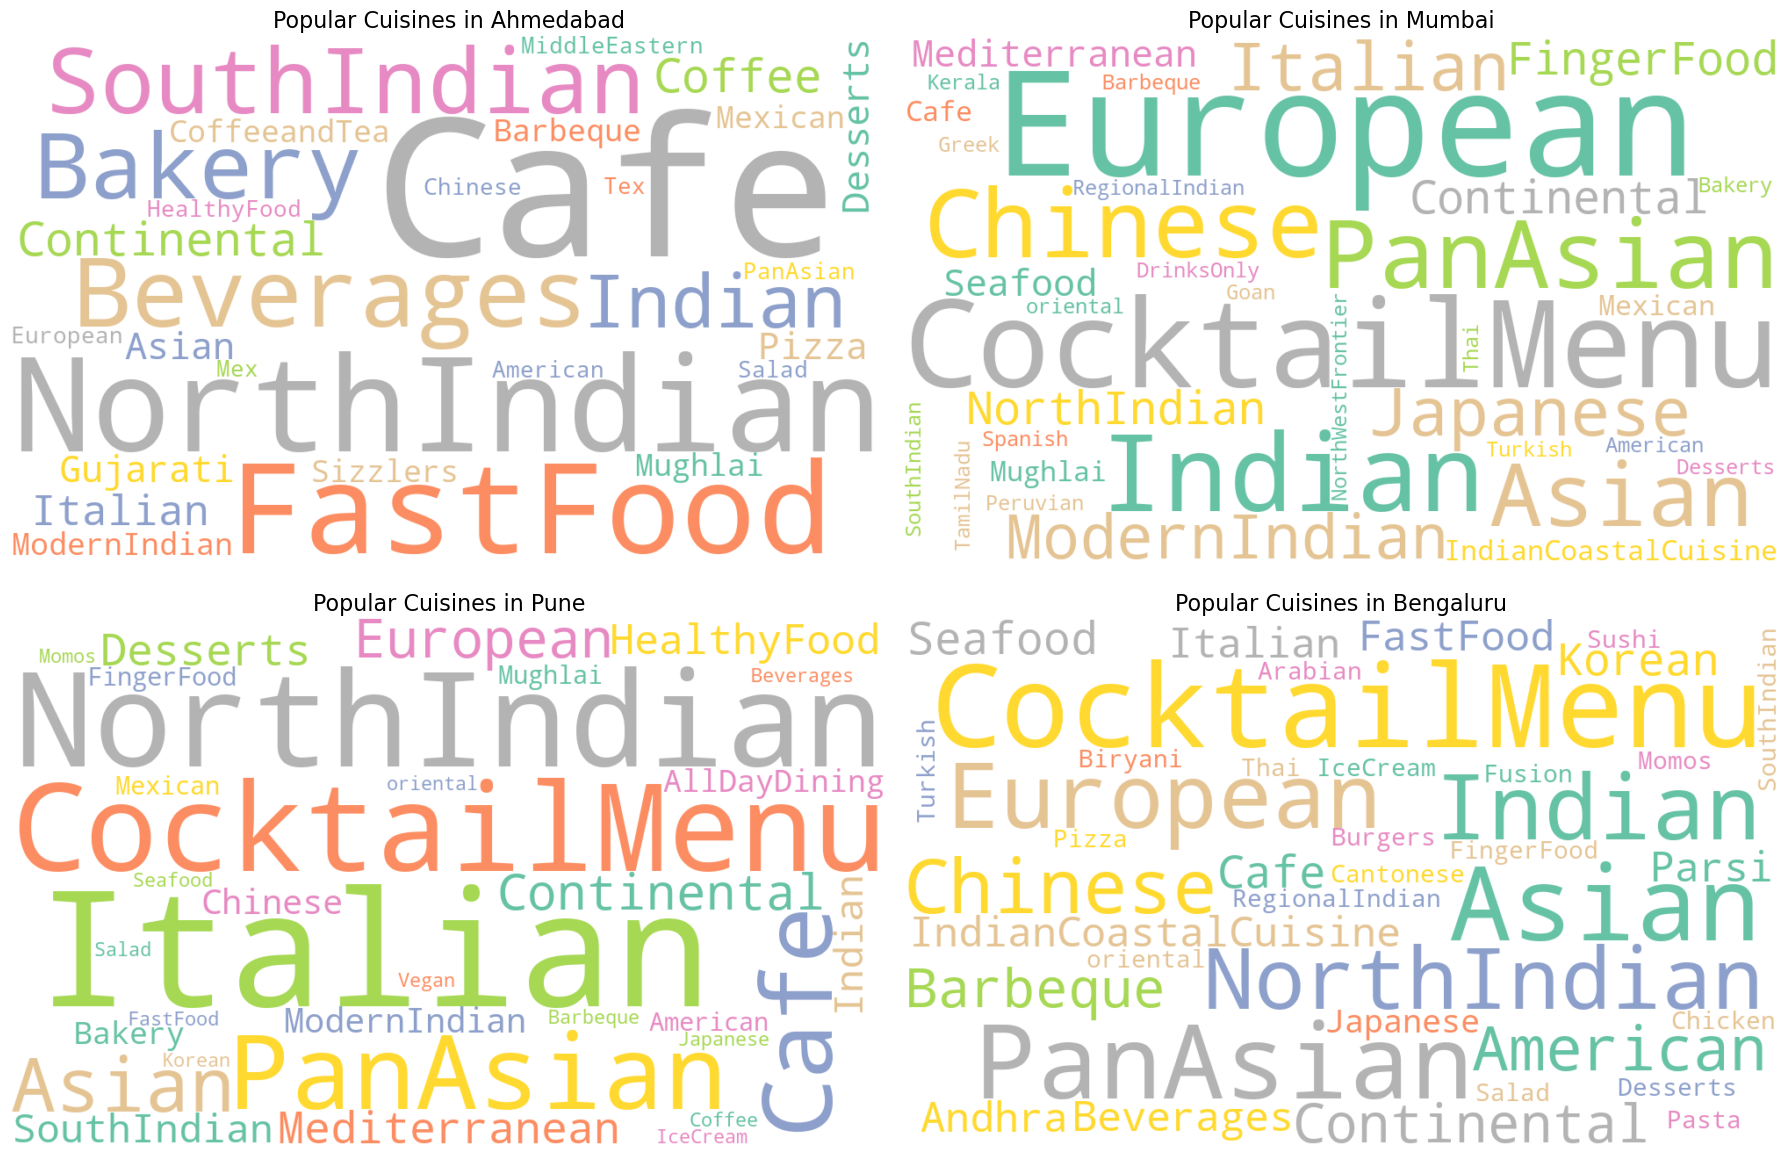

In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

city = ['Ahmedabad', 'Mumbai', 'Pune', 'Bengaluru']

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 rows, 2 cols for 4 cities
axes = axes.flatten()  # To loop easily over 1D list of axes

# Prepare stopwords
stopwords = set(STOPWORDS)
stopwords.update(['Multicuisine'])  # optional, add more if needed

for i, c in enumerate(city):
    c_dishes = ' '.join(ex_data[ex_data['LOCATION'] == c]['DISHES'].astype(str))
    
    wordcloud = WordCloud(
        width=1000, height=600,
        background_color='white',
        colormap='Set2',
        max_words=75,
        stopwords=stopwords
    ).generate(c_dishes)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"Popular Cuisines in {c}", fontsize=16)

# Add spacing between plots
plt.tight_layout()
plt.show()


In [76]:
# ['RATING', 'APPROX', 'DISCOUNT']
# ----------------------------------------
# ['NAME', 'AREA', 'DISHES', 'LOCATION']

In [60]:
df['DISHES'].describe().T

count                540
unique               139
top       [Multicuisine]
freq                 215
Name: DISHES, dtype: object

In [4]:
df

NAME  RATING  \
0                                  Table Tales     4.8   
1                      Banjara- Gourmet Dining     4.5   
2               Laurel - An Essence Of Flavors     5.0   
3                           The Chocolate Room     5.0   
4                                      Essence     4.5   
..                                         ...     ...   
535                       Blah Bla (Indigo XP)     3.9   
536                               Scottish Pub     4.8   
537  Salt - Pan Indian Restaurant, Bar & Grill     4.2   
538                                 Frenzy Pub     4.5   
539                                 Howl’n Pub     4.3   

                                  AREA                 DISHES  APPROX  \
0             Bodakdev, West Ahmedabad           Multicuisine    1500   
1             Bodakdev, West Ahmedabad           Multicuisine    1700   
2                     Ambli, Ahmedabad           Multicuisine    1800   
3        Prahlad Nagar, West Ahmedabad                 Bakery     500   
4              Crowne Plaza, Ahmedabad   Indian, North Indian    2000   
..                                 ...                    ...     ...   
535       Koramangala, South Bengaluru           Multicuisine    2000   
536  St. Marks Road, Central Bengaluru           Multicuisine    2000   
537         UB City, Central Bengaluru  Indian, Cocktail Menu    2000   
538       Marathahalli, East Bengaluru           Multicuisine    2000   
539   Church Street, Central Bengaluru           Multicuisine    1400   

     DISCOUNT   LOCATION  
0        10.0  Ahmedabad  
1        20.0  Ahmedabad  
2        20.0  Ahmedabad  
3        35.0  Ahmedabad  
4        50.0  Ahmedabad  
..        ...        ...  
535      40.0  Bengaluru  
536      10.0  Bengaluru  
537       NaN  Bengaluru  
538      40.0  Bengaluru  
539      10.0  Bengaluru  

[540 rows x 7 columns]

In [10]:
df[df['LOCATION'] == 'Ahmedabad']

NAME  RATING                           AREA  \
0                        Table Tales     4.8       Bodakdev, West Ahmedabad   
1            Banjara- Gourmet Dining     4.5       Bodakdev, West Ahmedabad   
2     Laurel - An Essence Of Flavors     5.0               Ambli, Ahmedabad   
3                 The Chocolate Room     5.0  Prahlad Nagar, West Ahmedabad   
4                            Essence     4.5        Crowne Plaza, Ahmedabad   
..                               ...     ...                            ...   
130                        Taco Bell     5.0        Sarkhej, West Ahmedabad   
131                    Waffle Castle     5.0      Satellite, West Ahmedabad   
132                          Kabhi B     5.0      Satellite, West Ahmedabad   
133                       Cafe Patio     4.3        Thaltej, West Ahmedabad   
134          Ashray The Restaurant\t     2.5       Bodakdev, West Ahmedabad   

                   DISHES  APPROX  DISCOUNT   LOCATION  
0            Multicuisine    1500      10.0  Ahmedabad  
1            Multicuisine    1700      20.0  Ahmedabad  
2            Multicuisine    1800      20.0  Ahmedabad  
3                  Bakery     500      35.0  Ahmedabad  
4    Indian, North Indian    2000      50.0  Ahmedabad  
..                    ...     ...       ...        ...  
130      Mexican, Tex-Mex     400       NaN  Ahmedabad  
131              Desserts     200       NaN  Ahmedabad  
132                Bakery     300       NaN  Ahmedabad  
133               Italian     500      25.0  Ahmedabad  
134          Multicuisine     700      10.0  Ahmedabad  

[135 rows x 7 columns]

<Axes: xlabel='RATING', ylabel='APPROX'>

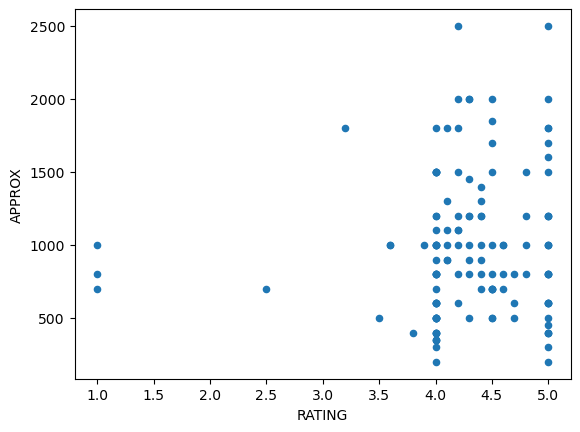

In [11]:
df[df['LOCATION'] == 'Ahmedabad'].plot(kind="scatter", x="RATING", y="APPROX")

<Axes: xlabel='APPROX', ylabel='DISCOUNT'>

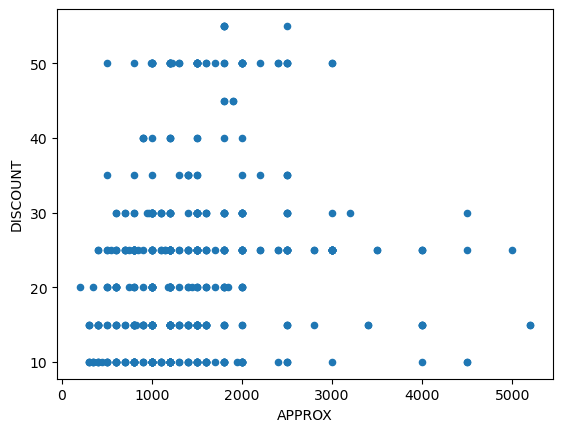

In [78]:
df.plot(kind="scatter", x="APPROX", y="DISCOUNT")

<Axes: xlabel='RATING', ylabel='DISCOUNT'>

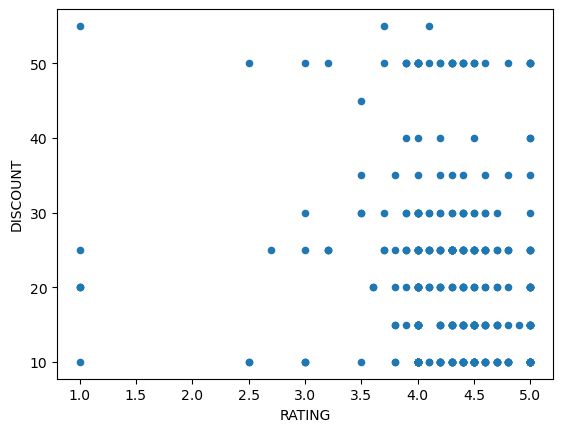

In [12]:
df.plot(kind="scatter", x="RATING", y="DISCOUNT")

<Axes: ylabel='DISHES'>

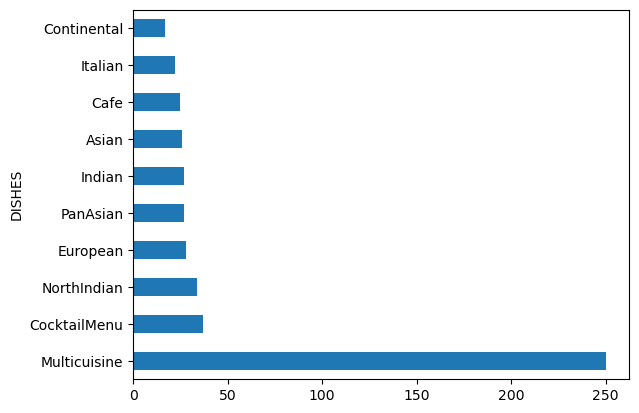

In [23]:
d = ex_data["DISHES"].value_counts().head(10)
d.plot(kind="barh")

<Axes: title={'center': 'APPROX'}, xlabel='DISHES'>

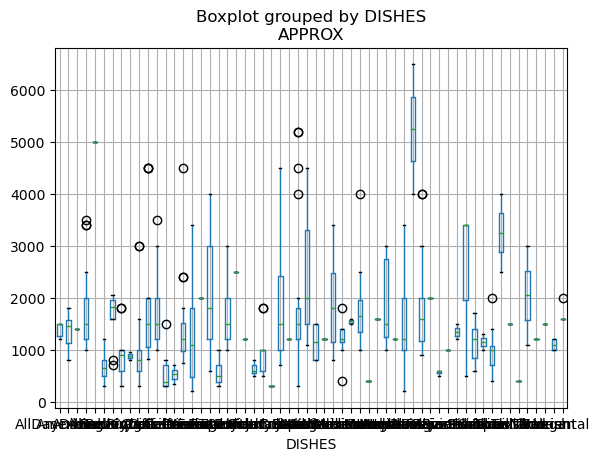

In [81]:
ex_data.boxplot(by="DISHES", column="APPROX")

In [70]:
ex_data[ex_data['LOCATION'] == 'Pune'].groupby('DISHES')['APPROX'].mean().sort_values(ascending=False)

1820.0

<Axes: xlabel='DISHES'>

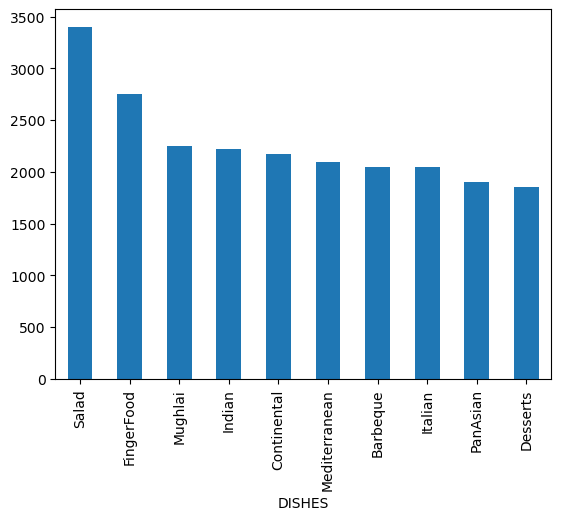

In [75]:
p_approx = ex_data[ex_data['LOCATION'] == 'Pune'].groupby('DISHES')['APPROX'].mean().sort_values(ascending=False).head(10)
p_approx.plot(kind='bar')

In [80]:
# city = ['Ahmedabad', 'Mumbai', 'Pune', 'Bengaluru']
# for c in city:
#     c_approx = ex_data[ex_data['LOCATION'] == c].groupby('DISHES')['APPROX'].mean().sort_values(ascending=False).head(10)
#     plt.figure(figsize=(10, 6))
#     c_approx.plot(kind='barh', color='skyblue')
#     plt.title(f"Top 10 Costliest Dishes in {c}", fontsize=15)
#     plt.xlabel("Average Price", fontsize=12)
#     plt.ylabel("Dish", fontsize=12)
#     plt.gca().invert_yaxis()  # So highest is at the top
#     plt.tight_layout()
#     plt.show()

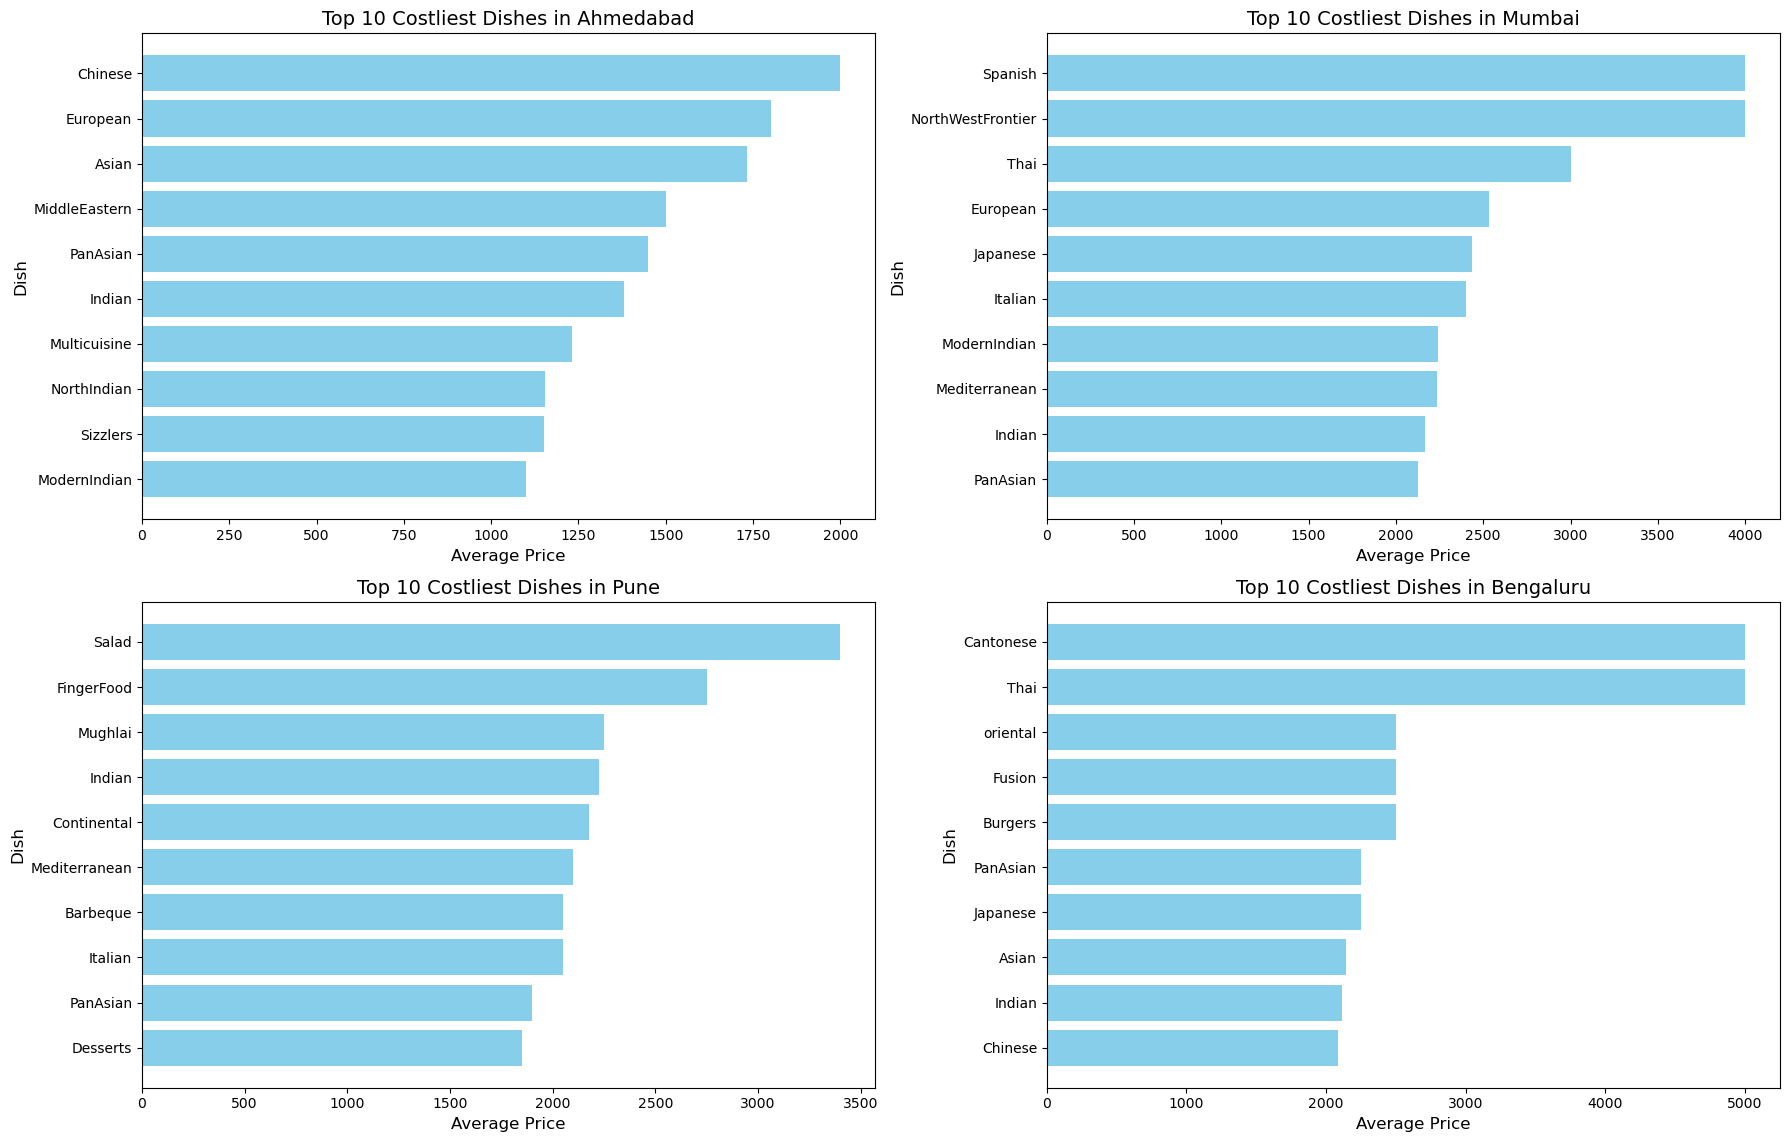

In [83]:
city = ['Ahmedabad', 'Mumbai', 'Pune', 'Bengaluru']

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten to make looping easier

for i, c in enumerate(city):
    c_approx = (
        ex_data[ex_data['LOCATION'] == c]
        .groupby('DISHES')['APPROX']
        .mean()
        .sort_values(ascending=False)
        .head(10)
    )
    
    axes[i].barh(c_approx.index, c_approx.values, color='skyblue')
    axes[i].set_title(f"Top 10 Costliest Dishes in {c}", fontsize=14)
    axes[i].set_xlabel("Average Price", fontsize=12)
    axes[i].set_ylabel("Dish", fontsize=12)
    axes[i].invert_yaxis()  # Highest value at top

# # Add a main title and spacing
# fig.suptitle("Top 10 Average Dish Prices per City", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

<Axes: ylabel='DISHES'>

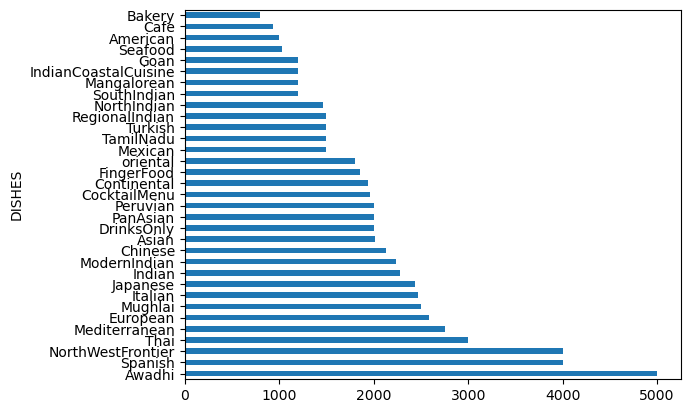

In [84]:
m_approx = ex_data[ex_data['LOCATION'] == 'Mumbai'].groupby('DISHES')['APPROX'].mean().sort_values(ascending=False)
m_approx.plot(kind='barh')

<Axes: ylabel='DISHES'>

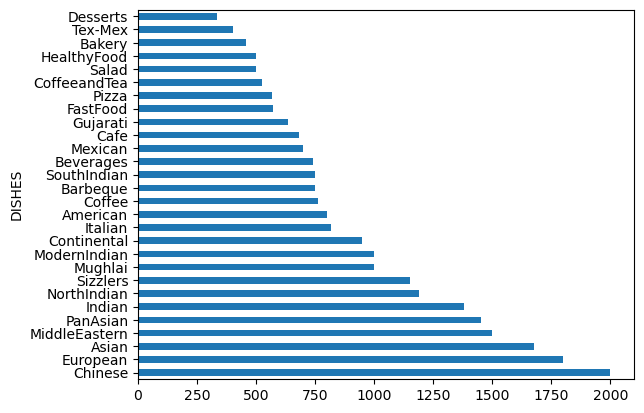

In [85]:
a_approx = ex_data[ex_data['LOCATION'] == 'AHEMDABAD'].groupby('DISHES')['APPROX'].mean().sort_values(ascending=False)
a_approx.plot(kind='barh')

<Axes: ylabel='DISHES'>

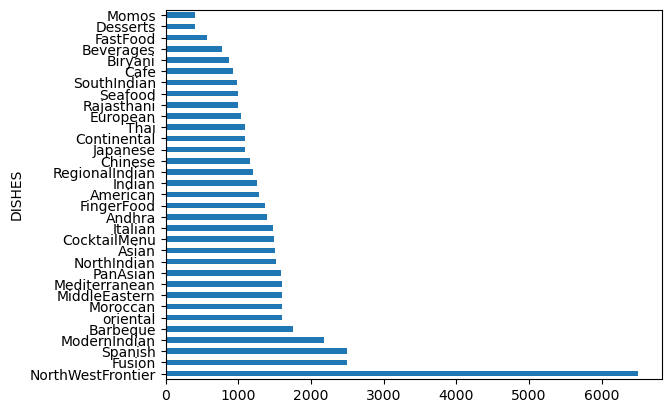

In [86]:
c_approx = ex_data[ex_data['LOCATION'] == 'Chennai'].groupby('DISHES')['APPROX'].mean().sort_values(ascending=False)
c_approx.plot(kind='barh')

<Axes: ylabel='DISHES'>

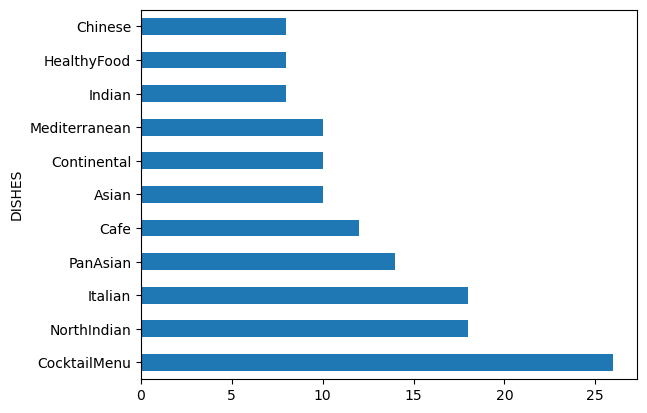

In [87]:
p_dishes = ex_data[ex_data['LOCATION'] == 'Pune'].groupby('DISHES')['DISHES'].count().sort_values(ascending=False).head(11)
p_dishes.plot(kind='barh')

<Axes: ylabel='DISHES'>

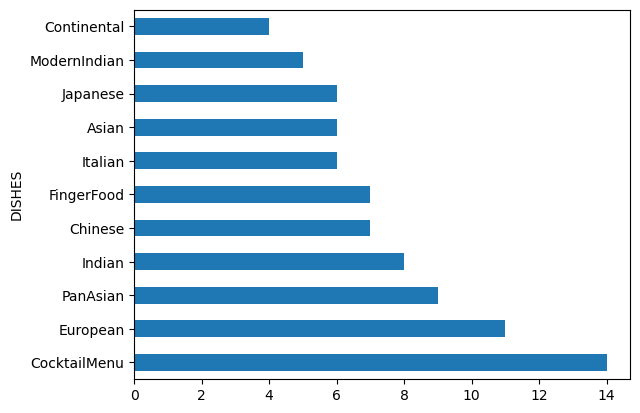

In [88]:
m_dishes = ex_data[ex_data['LOCATION'] == 'Mumbai'].groupby('DISHES')['DISHES'].count().sort_values(ascending=False).head(11)
m_dishes.plot(kind='barh')

<Axes: ylabel='DISHES'>

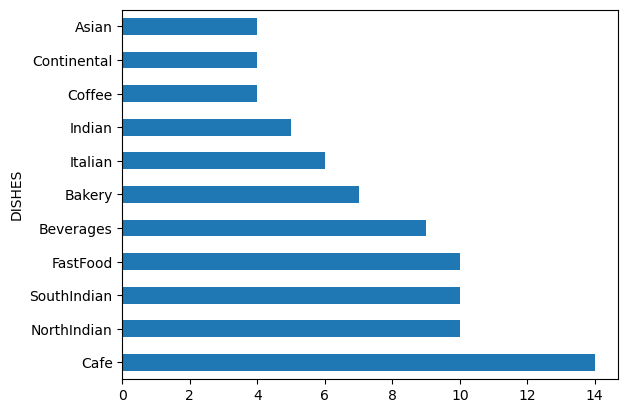

In [89]:
a_dishes = ex_data[ex_data['LOCATION'] == 'AHEMDABAD'].groupby('DISHES')['DISHES'].count().sort_values(ascending=False).head(11)
a_dishes.plot(kind='barh')

<Axes: ylabel='DISHES'>

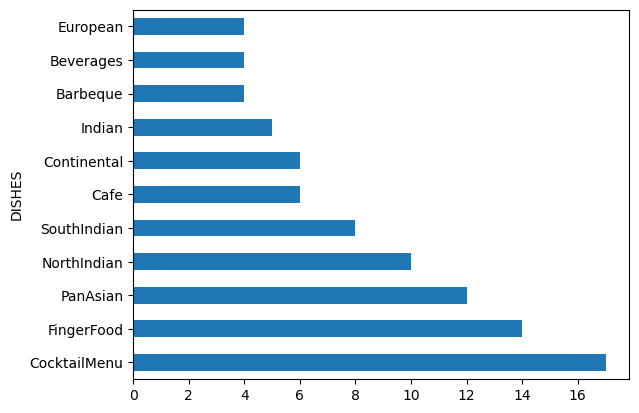

In [90]:
c_dishes = ex_data[ex_data['LOCATION'] == 'Chennai'].groupby('DISHES')['DISHES'].count().sort_values(ascending=False).head(11)
c_dishes.plot(kind='barh')

In [91]:
df.columns

Index(['NAME', 'RATING', 'AREA', 'DISHES', 'APPROX', 'LOCATION', 'DISCOUNT'], dtype='object')

<Axes: ylabel='DISHES'>

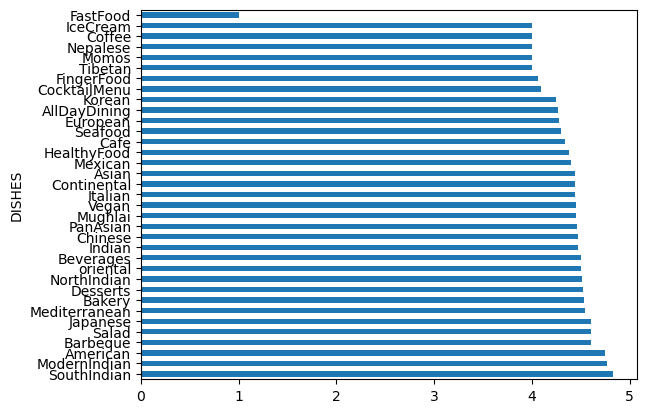

In [92]:
p_rating = ex_data[ex_data['LOCATION'] == 'Pune'].groupby('DISHES')['RATING'].mean().sort_values(ascending=False)
p_rating.plot(kind='barh')

<Axes: ylabel='DISHES'>

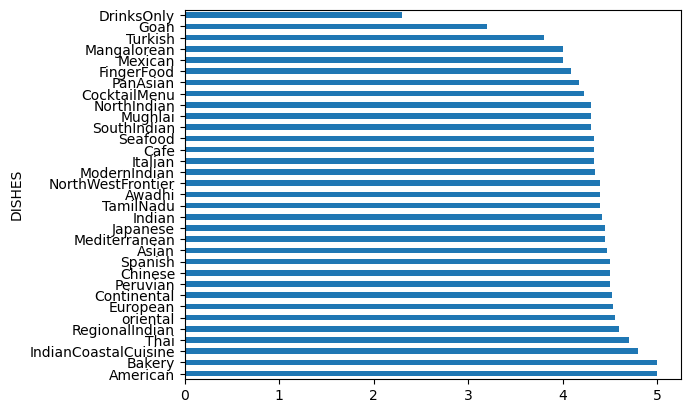

In [93]:
m_rating = ex_data[ex_data['LOCATION'] == 'Mumbai'].groupby('DISHES')['RATING'].mean().sort_values(ascending=False)
m_rating.plot(kind='barh')

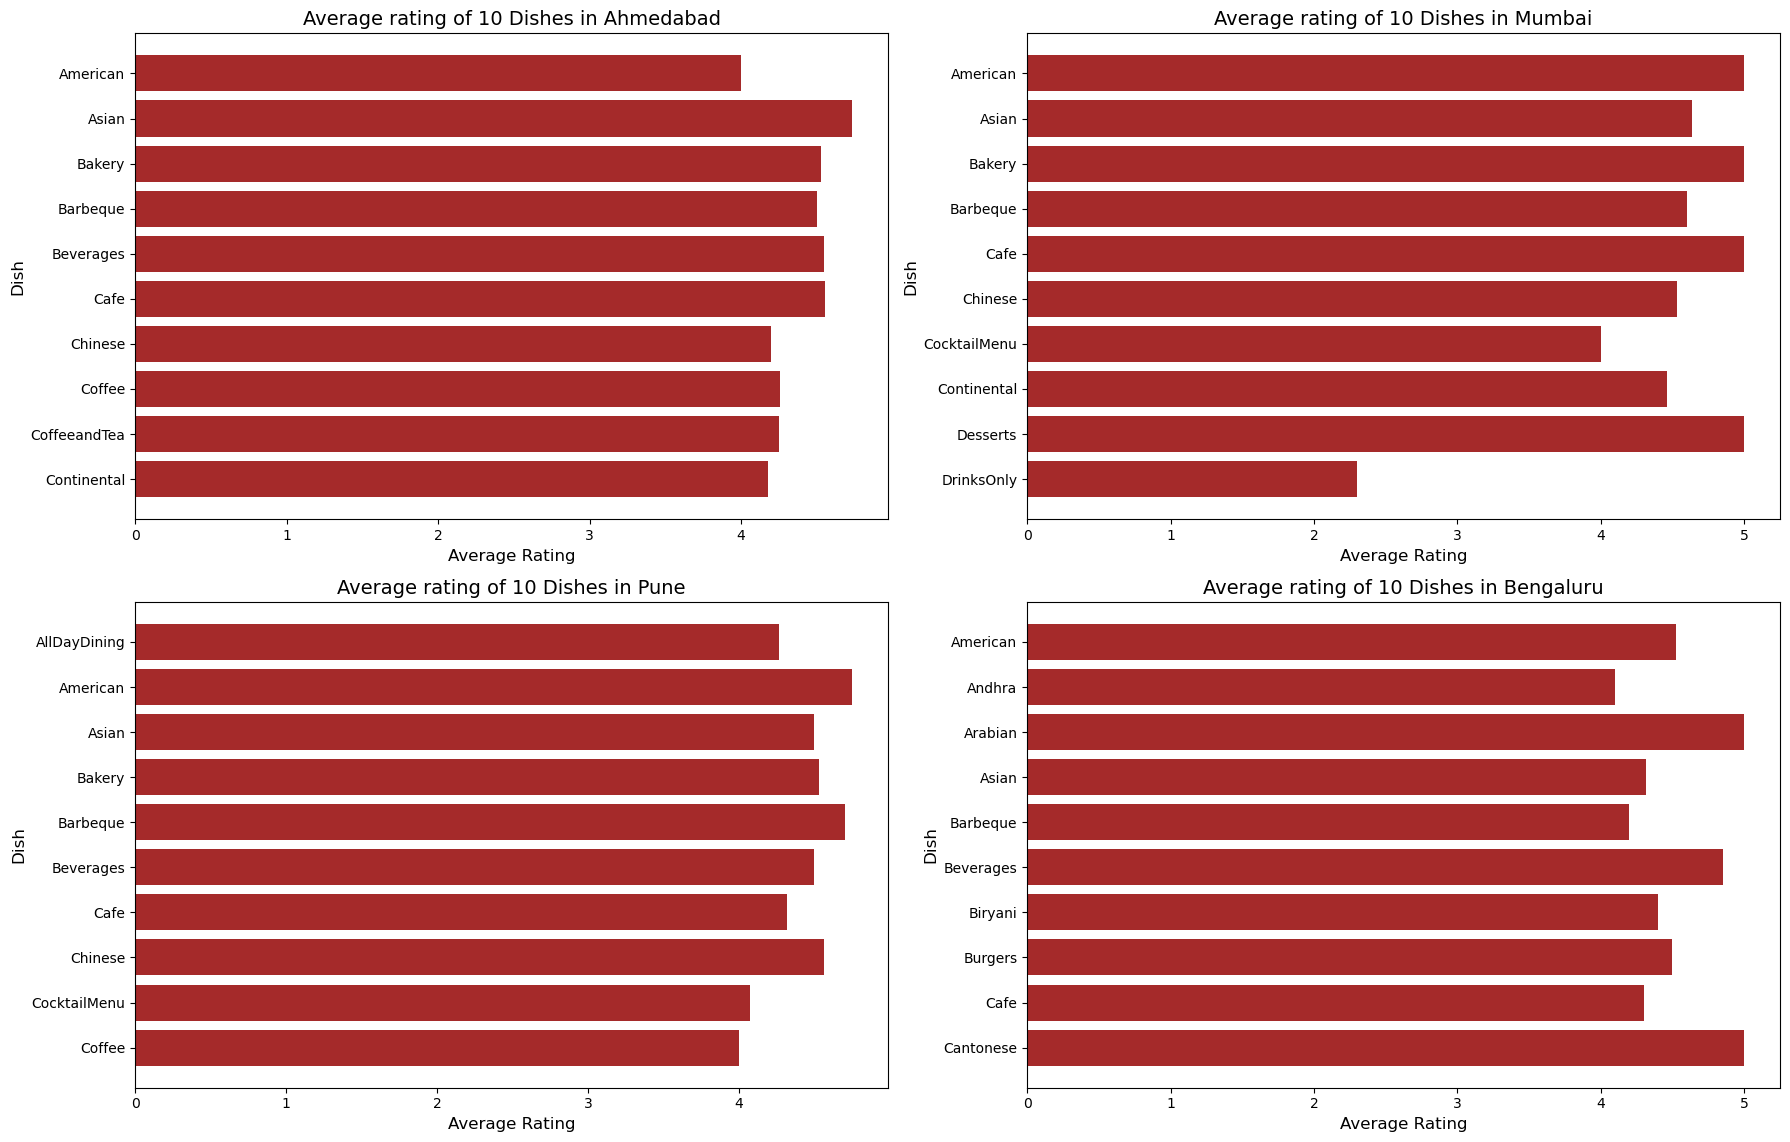

In [90]:
city = ['Ahmedabad', 'Mumbai', 'Pune', 'Bengaluru']

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten to make looping easier

for i, c in enumerate(city):
    c_rating = (
        ex_data[ex_data['LOCATION'] == c]
        .groupby('DISHES')['RATING']
        .mean()
        .head(10)
    )
    
    axes[i].barh(c_rating.index, c_rating.values, color='brown')
    axes[i].set_title(f"Average rating of 10 Dishes in {c}", fontsize=14)
    axes[i].set_xlabel("Average Rating", fontsize=12)
    axes[i].set_ylabel("Dish", fontsize=12)
    axes[i].invert_yaxis()  # Highest value at top

# # Add a main title and spacing
# fig.suptitle("Top 10 Average Dish Prices per City", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

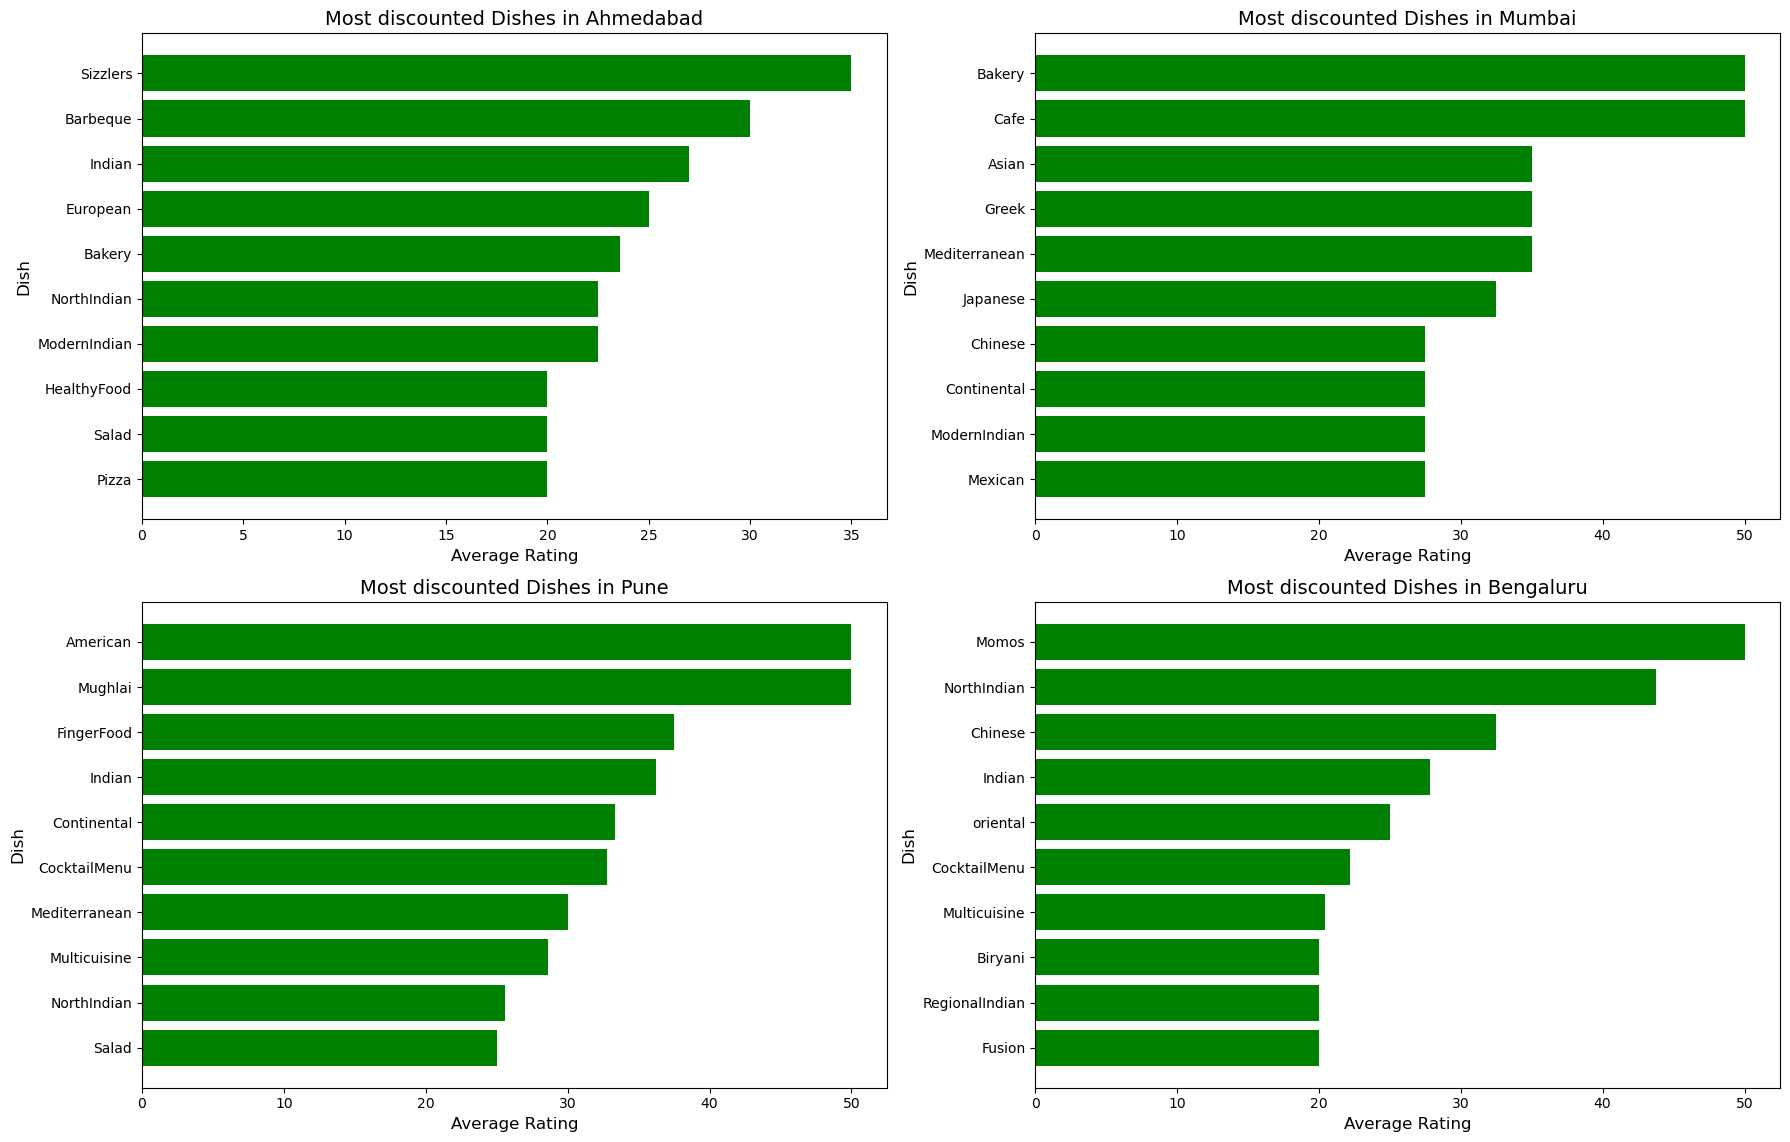

In [94]:
city = ['Ahmedabad', 'Mumbai', 'Pune', 'Bengaluru']

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten to make looping easier

for i, c in enumerate(city):
    c_discount = (
        ex_data[ex_data['LOCATION'] == c]
        .groupby('DISHES')['DISCOUNT']
        .mean()
        .sort_values(ascending=False)
        .head(10)
    )
    
    axes[i].barh(c_discount.index, c_discount.values, color='green')
    axes[i].set_title(f"Most discounted Dishes in {c}", fontsize=14)
    axes[i].set_xlabel("Average Rating", fontsize=12)
    axes[i].set_ylabel("Dish", fontsize=12)
    axes[i].invert_yaxis()  # Highest value at top

# # Add a main title and spacing
# fig.suptitle("Average Dish Prices per City", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

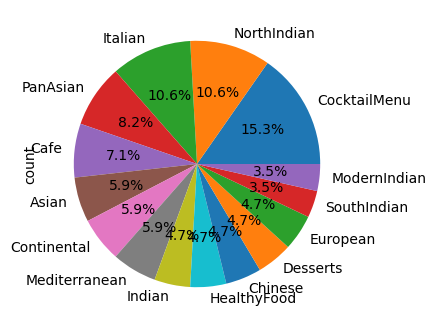

In [94]:
plt.figure(figsize=(8,4))
p_dishpie = ex_data[ex_data['LOCATION'] == 'Pune'].groupby('DISHES')['DISHES'].value_counts().sort_values(ascending=False).head(15)
p_dishpie.plot(kind='pie', autopct= '%1.1f%%')
plt.show()

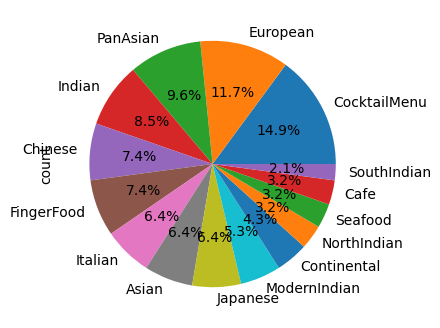

In [95]:
plt.figure(figsize=(8,4))
m_dishpie = ex_data[ex_data['LOCATION'] == 'Mumbai'].groupby('DISHES')['DISHES'].value_counts().sort_values(ascending=False).head(15)
m_dishpie.plot(kind='pie', autopct= '%1.1f%%')
plt.show()

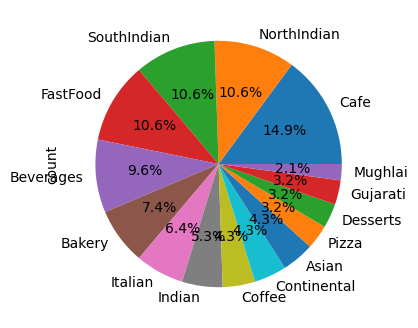

In [96]:
plt.figure(figsize=(8,4))
a_dishpie = ex_data[ex_data['LOCATION'] == 'AHEMDABAD'].groupby('DISHES')['DISHES'].value_counts().sort_values(ascending=False).head(15)
a_dishpie.plot(kind='pie', autopct= '%1.1f%%')
plt.show()

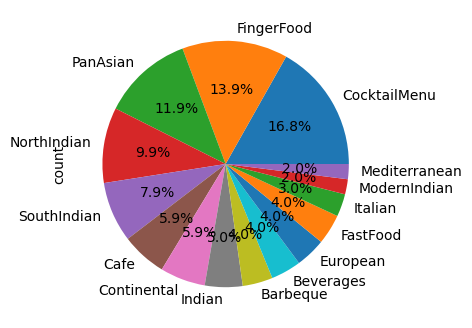

In [97]:
plt.figure(figsize=(8,4))
c_dishpie = ex_data[ex_data['LOCATION'] == 'Chennai'].groupby('DISHES')['DISHES'].value_counts().sort_values(ascending=False).head(15)
c_dishpie.plot(kind='pie', autopct= '%1.1f%%')
plt.show()

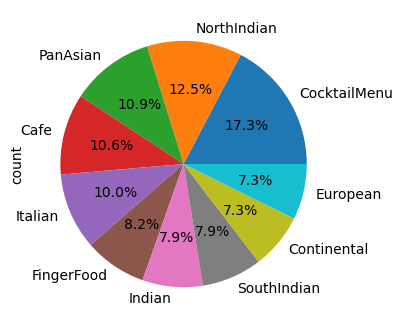

In [102]:
plt.figure(figsize=(8,4))
w_dishpie = ex_data[ex_data['DISHES'] != 'Multicuisine'].groupby('DISHES')['DISHES'].value_counts().sort_values(ascending=False).head(10)
w_dishpie.plot(kind='pie', autopct= '%1.1f%%')
plt.show()

<Axes: ylabel='DISHES'>

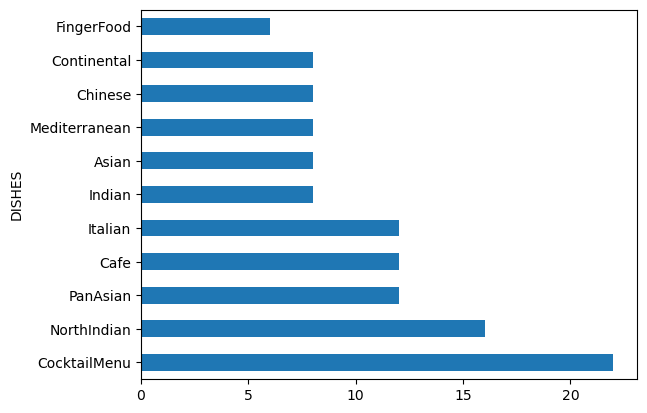

In [103]:
p_avgdisc = ex_data[ex_data['LOCATION'] == 'Pune'].groupby('DISHES')['DISCOUNT'].count().sort_values(ascending=False).head(11)
p_avgdisc.plot(kind='barh')

In [ ]:
m_avgdisc = ex_data[ex_data['LOCATION'] == 'Mumbai'].groupby('DISHES')['DISCOUNT'].count().sort_values(ascending=False).head(11)
m_avgdisc.plot(kind='barh')

<Axes: ylabel='DISHES'>

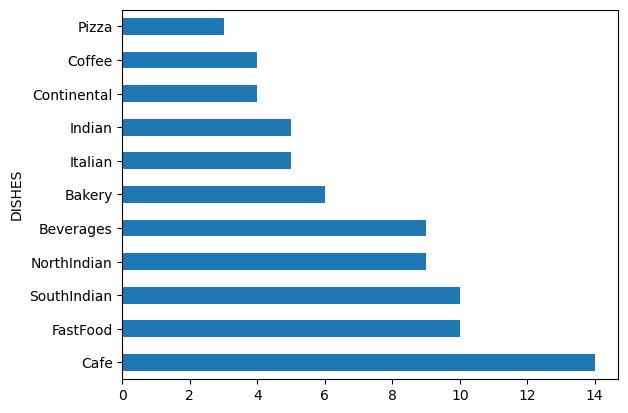

In [104]:
a_avgdisc = ex_data[ex_data['LOCATION'] == 'AHEMDABAD'].groupby('DISHES')['DISCOUNT'].count().sort_values(ascending=False).head(11)
a_avgdisc.plot(kind='barh')

<Axes: ylabel='DISHES'>

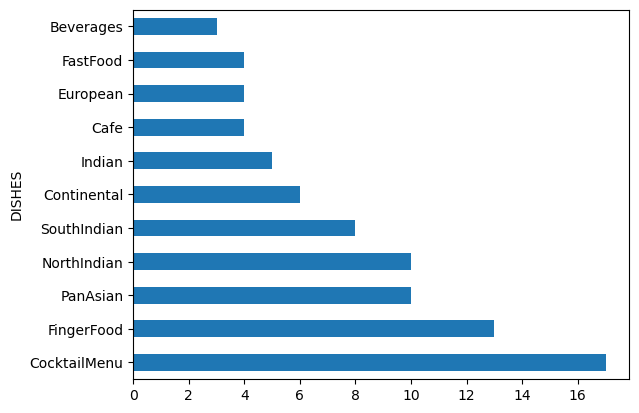

In [105]:
c_avgdisc = ex_data[ex_data['LOCATION'] == 'Chennai'].groupby('DISHES')['DISCOUNT'].count().sort_values(ascending=False).head(11)
c_avgdisc.plot(kind='barh')

In [106]:
df.columns

Index(['NAME', 'RATING', 'AREA', 'DISHES', 'APPROX', 'LOCATION', 'DISCOUNT'], dtype='object')

In [107]:
ex_data.groupby('LOCATION')['RATING'].mean()

LOCATION
AHEMDABAD    4.281081
Chennai      4.238525
Mumbai       4.336522
Pune         4.372034
Name: RATING, dtype: float64

In [108]:
ex_data.groupby('LOCATION')['APPROX'].mean()

LOCATION
AHEMDABAD     834.684685
Chennai      1358.303279
Mumbai       2065.565217
Pune         1636.440678
Name: APPROX, dtype: float64

In [109]:
ex_data.groupby('LOCATION')['DISCOUNT'].mean()

LOCATION
AHEMDABAD    19.081633
Chennai      23.101852
Mumbai       24.657534
Pune         21.157895
Name: DISCOUNT, dtype: float64

AttributeError: 'numpy.float64' object has no attribute 'index'

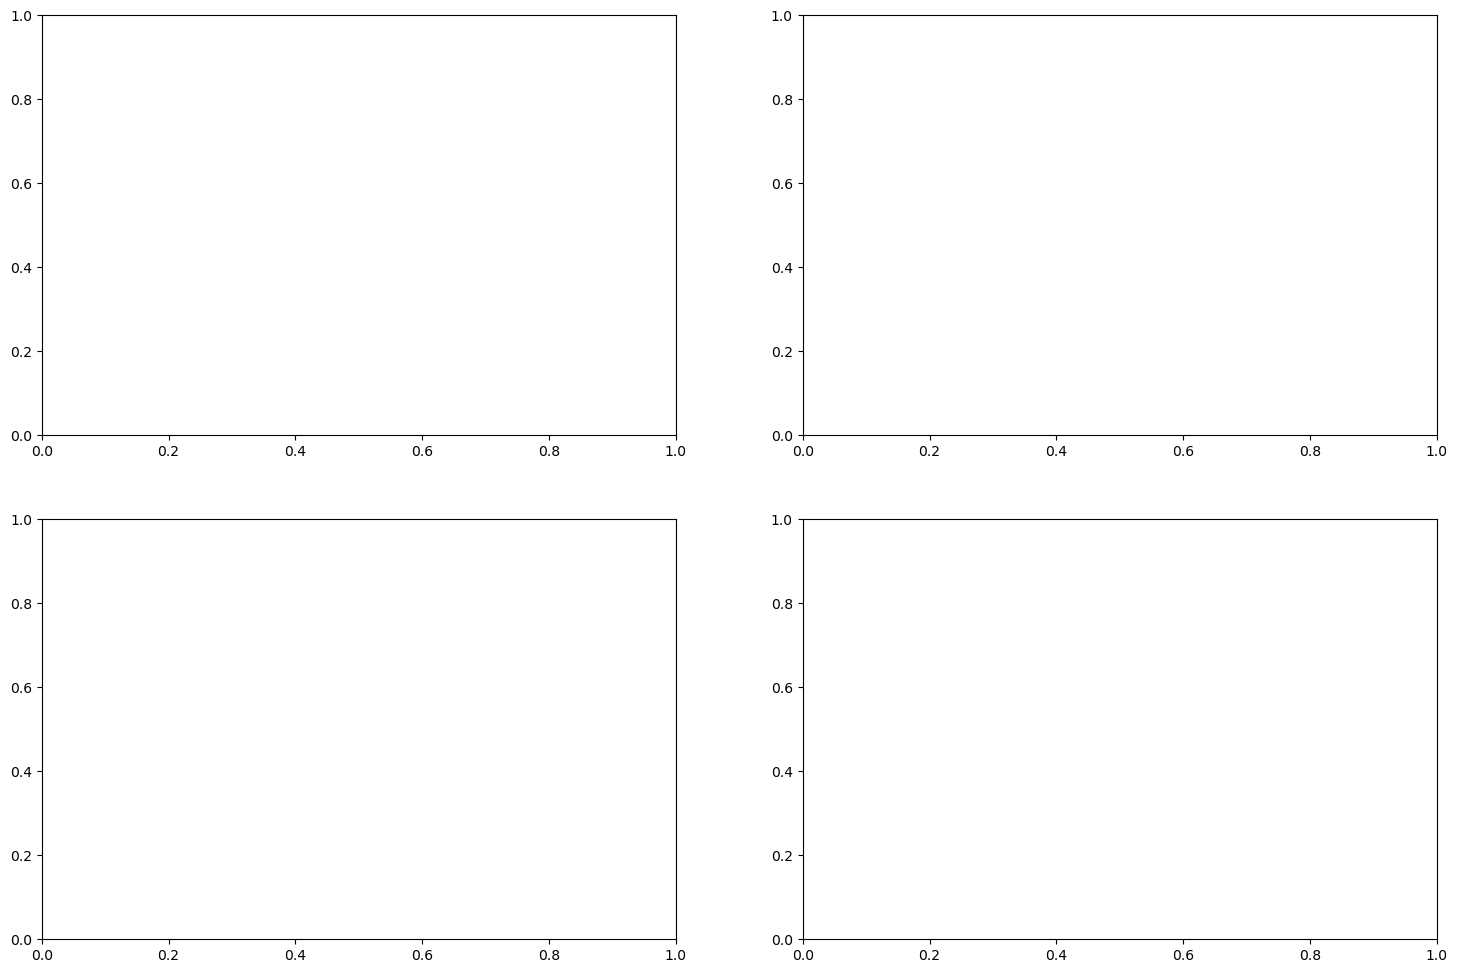

In [97]:
city = ['Ahmedabad', 'Mumbai', 'Pune', 'Bengaluru']

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten to make looping easier

for i, c in enumerate(city):
    c_discount = (
        ex_data[ex_data['LOCATION'] == c]
        ['DISCOUNT']
        .mean()
    )
    
    axes[i].barh(c_discount.index, c_discount.values, color='green')
    axes[i].set_title(f"Most discounted Dishes in {c}", fontsize=14)
    axes[i].set_xlabel("Average Rating", fontsize=12)
    axes[i].set_ylabel("Dish", fontsize=12)
    axes[i].invert_yaxis()  # Highest value at top

# # Add a main title and spacing
# fig.suptitle("Average Dish Prices per City", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

In [106]:
c_avg_price = (
    ex_data[ex_data['LOCATION'] == c]['APPROX'].mean()
)

1993.7988826815642

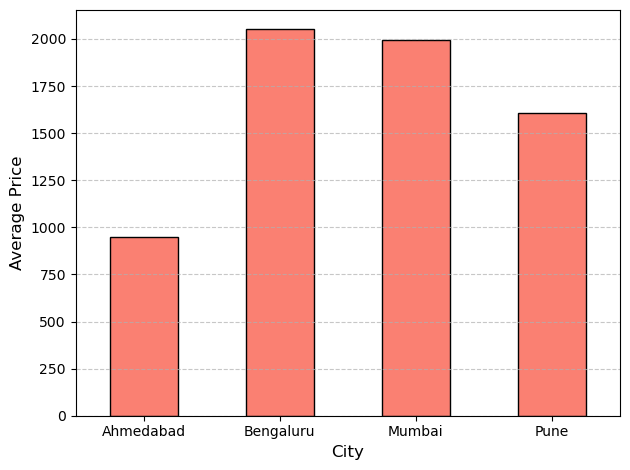

In [124]:
# Group by LOCATION and calculate mean APPROX price
avg_price_by_city = ex_data.groupby('LOCATION')['APPROX'].mean()

# Plot
avg_price_by_city.plot(kind='bar', color='salmon', edgecolor='black')

plt.xlabel("City", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

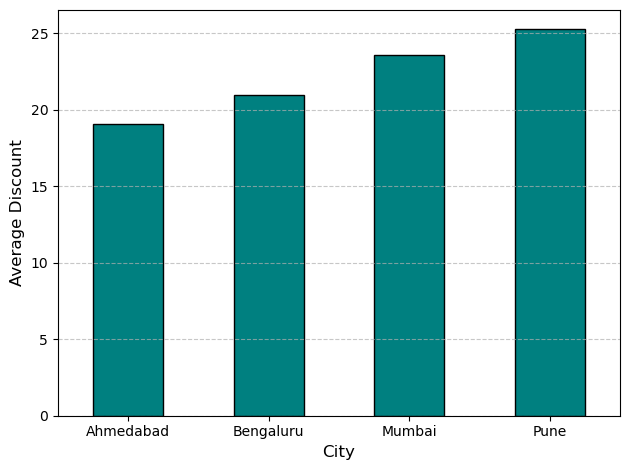

In [123]:
# Group by LOCATION and calculate mean APPROX price
avg_price_by_city = ex_data.groupby('LOCATION')['DISCOUNT'].mean()

# Plot
avg_price_by_city.plot(kind='bar', color='teal', edgecolor='black')

plt.xlabel("City", fontsize=12)
plt.ylabel("Average Discount", fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [53]:
def categorical(data, categorical_columns):
    for column_name in categorical_columns:
        if column_name in data:
            print(f'---{column_name}---')
            ### non-visual anallysis
            print(data[column_name].agg(['count','unique']))
            ## Visual analysis
            ## Bar plot
            plt.figure(figsize=(8,4))
            data[column_name].value_counts().plot(kind='bar')
            plt.title(f'Bar plot of {column_name}')
            plt.xlabel(column_name)
            plt.ylabel('Count')
            plt.show()
             ## Count plot
            plt.figure(figsize=(8,4))
            sns.countplot(x= data[column_name])
            plt.title(f'Count plot of {column_name}')
            plt.xlabel(column_name)
            plt.ylabel('Count')
            plt.show()
            ## Pie 
            plt.figure(figsize=(8,4))
            data[column_name].value_counts().plot(kind='pie', autopct= '%1.1f%%')
            plt.title(f'Pieplot of {column_name}')
            plt.show()

---NAME---
count                                                   675
unique    [The Sassy Spoon, Murphies - Bistro And Bar, M...
Name: NAME, dtype: object


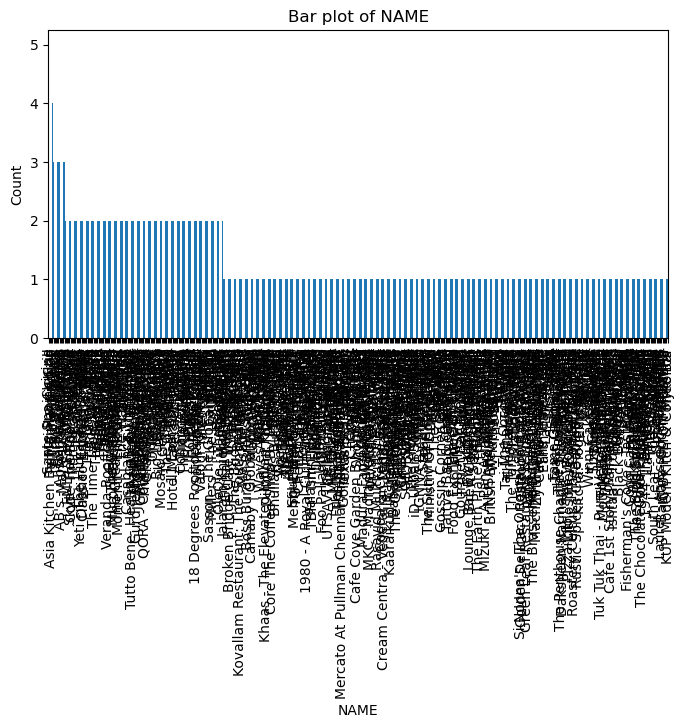

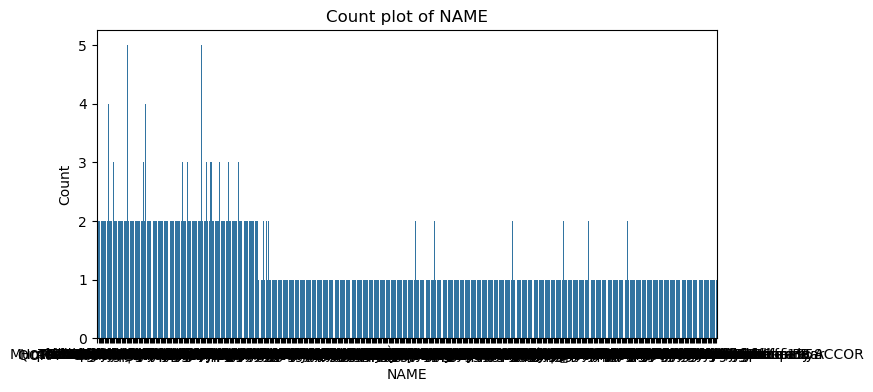

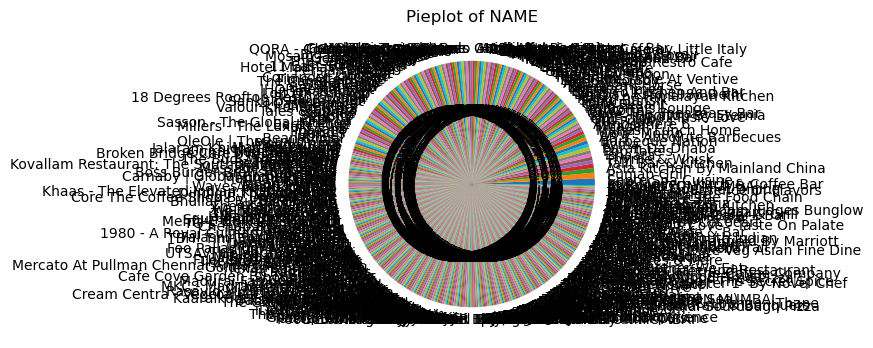

---AREA---
count                                                   675
unique    [Koregaon Park, Pune, Erandwane, Pune, Camp Ar...
Name: AREA, dtype: object


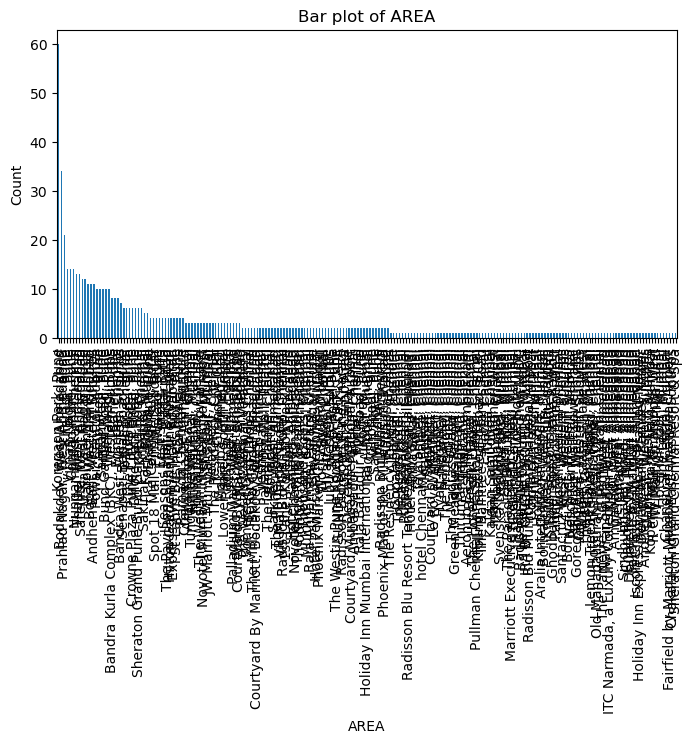

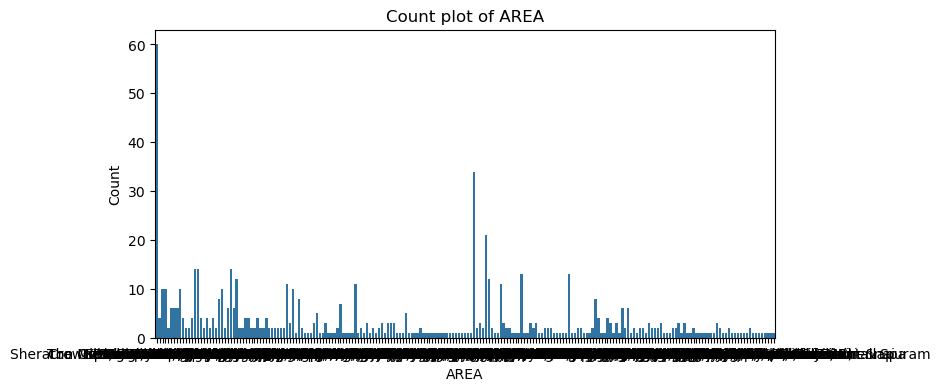

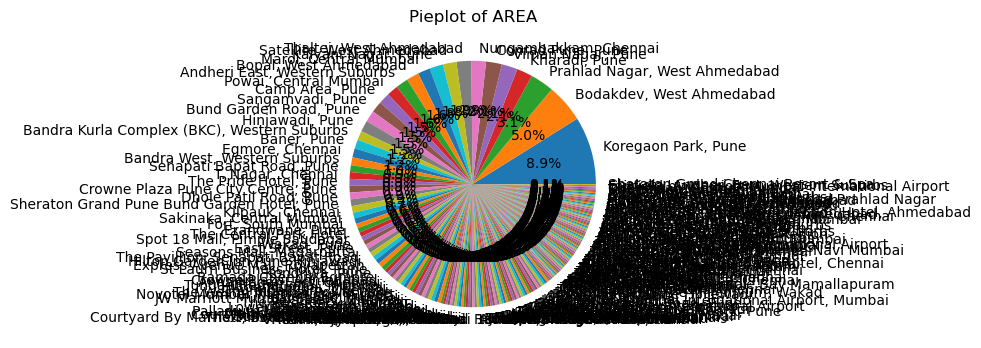

---DISHES---


TypeError: unhashable type: 'list'

In [56]:
categorical(df, cat_cols)